# Ground State Preparation of SU(2) Lattice Gauge Theory in Quantum Computer

[Kogut-Susskind Hamiltonian](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.11.395) for SU(2) Gauge Theory is:
$$
H = \frac{g^2}{2}\sum_{\rm links} (E_i^a)^2 - \frac{2}{a^2g^2} \sum_{\rm plaquettes} Z({\bf n}) \,,
$$
where, a in the denominator is the lattice spacing and in the superscript denotes SU(2) gauge group indices that are implicitly summer over, g is the gauge coupling constant with mass dimension $[g] = 0.5$ in 2+1 dimensions, $i = x$ or $y$ denotes spatial directions (implicitly summed), $\bf{n} = (n_x, n_y)$ is a a lattice point and $Z(\bf{n})$ is the plaquette operator, $E_i^a$ is the electric field along $i$th spatial direction associated with gauge group index $a$. 

**Mapping onto Spin Chain:**
The Hamiltonian of the SU(2) gauge theory on a plaquette chain with a basis truncated at $j=1/2$ can be mapped onto a quantum spin chain, shown in 
$$ H = \frac{3}{2}g^2\sum_{i=0}^{N-1}\frac{\sigma_i^z+1}{2} - \frac{3}{4}g^2\sum_{i=0}^{N-1}\frac{\sigma_i^z+1}{2}\frac{\sigma_{i+1}^z+1}{2} - \frac{2}{a^2g^2} \sum_{i=0}^{N-1} \big(-0.5\big)^{\frac{\sigma_{i-1}^z+\sigma_{i+1}^z+ 2}{2}}
\sigma_i^x \,.$$
Up to an irrelevant constant, this Hamiltonian can be rewritten as (see Ref. [1](https://arxiv.org/abs/2103.05179) and [2](https://arxiv.org/abs/2205.09247)} for a similar expression)
$$ H_{tot} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z + h_x \sum_{i=0}^{N-1} \frac{1-3\sigma_{i-1}^z}{4} \frac{1-3\sigma_{i+1}^z}{4} \sigma_i^x \, ,$$

That is,
$$ H_{tot} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z + \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$$


where $J = -3 g^2/16$, $h_z=3 g^2/8$ and $h_x = -2/(ag)^2$. Under the **periodic boundary condition**, $\sigma_N^i=\sigma_0^i$. The Hamiltonian is rescaled to be unitless and so are the parameters $J$, $h_z$ and $h_x$.

## ADAPT-VQE Algorithm for the Interacting Ground State Preparation

Here, we plan to use ADAPT-VQE algorithm for the ground state preparation of the SU(2) gauge theory in the quantum computer. Find reference here, [ADAPT (Adaptive Derivative-Assembled Problem-Tailored)](https://www.nature.com/articles/s41467-019-10988-2).

The total Hamiltonian is: $H = H_E + H_M$ where,

Electric Hamiltonian:
$$H_{E} = J \sum_{i=0}^{N-1}\sigma_i^z\sigma_{i+1}^z + h_z \sum_{i=0}^{N-1}\sigma_i^z$$


Magnetic Hamiltonian:
$$H_M = \frac{h_x}{16} \sum_{i=0}^{N-1} ( \sigma_i^x - 3\sigma_{i-1}^z \sigma_i^x - 3\sigma_i^x\sigma_{i+1}^z + 9 \sigma_{i-1}^z \sigma_i^x \sigma_{i+1}^z )$$

That is in terms of Pauli's (X, Z),
$$ H_{tot} = \sum_{i=0}^{N-1}  [J Z_i Z_{i+1} + h_z Z_i + \frac{h_x}{16} ( X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1})]$$

where, $J = -3 g^2/16$, $h_z=3 g^2/8$ and $h_x = -2/(ag)^2$. Under the **periodic boundary condition**, $\sigma_N^i=\sigma_0^i$. The Hamiltonian is rescaled to be unitless and so are the parameters $J$, $h_z$ and $h_x$.


Now, let us define the hamiltonian denstiy as,
$ H_i = h_z Z_i + J/2 (Z_i Z_{i+1} + Z_{i-1} Z_i) + hx/16 * (X_i - 3 Z_{i-1} X_i - 3 X_i Z_{i+1} + 9 Z_{i-1} X_i Z_{i+1}) $


**ADAPT-VQE Algorithm:**

**Step 1:** Construct a pool of operators $\{\hat{O}_1, \hat{O}_2, ..., \hat{O}_k\}$ constrained by the symmetry of the system. 

The ADAPT-VQE depends on the choice of an efficient and scalable pool of operators. The operators need to be imaginary and anti-symmetric.


First, from the total hamiltonian, we can construct the operator pool $\{\hat{A}_1, \hat{A}_2, ..., \hat{A}_k\}$ that is not "imaginary and antisymmetric", taking the proper commutation of which we can get the operator pool $\{\hat{O}_1, \hat{O}_2, ..., \hat{O}_k\}$. Let's define the (real) operator pool as:

\begin{align*}
\hat{A}_1 &= Z_i \\
\hat{A}_2 &= Z_i Z_{i+1} \\
\hat{A}_3 &= X_i \\
\hat{A}_4 &= Z_{i-1} X_i \\
\hat{A}_5 &= X_i Z_{i+1} \\
\hat{A}_6 &= Z_{i-1} X_i Z_{i+1}
\end{align*}

Then, the operator pool to be used in ADAPT-VQE is:

\begin{align*}
\hat{O}_1 &= Y_i \\
\hat{O}_2 &= Y_i Z_{i+1} \\
\hat{O}_3 &= Z_i Y_{i+1} \\
\hat{O}_4 &= Z_{i-1} Y_i Z_{i+1} 
\end{align*}


**Step 2:** On the quantum device, initialize the quantum circuit the the current ansatz $\ket{\psi_{ansatz}}$ with desired quantum numbers and the symmetries of the target. The ansatz is dynamically created: $\cdots e^{i \theta_3  \hat{O}_3}e^{i \theta_2 \hat{O}_2}e^{i \theta_1 \hat{O}_1} \ket{\psi_{ref}}$. Here, in our case, let's take the ground state of the electric part of the total hamiltonian as our reference state: $\ket{\psi_{ref}} = \ket{11111 \cdots 11111}$ (all spins down -- obtained by applying X-gate to the initialized (at 0) quantum circuit).

**Step 3:** Each time add one operator that gives the largest gradient magnitude.

Measure the energy gradient $\frac{\partial E}{\partial \theta_i} |_{\theta_i=0}$ with respect to the variational parameter $\theta_i$ of the candidate pool operator $\hat{A}$. Repeat this step for every pool operator. Here, we measure the expectation value of the commutator of hamiltonian with each operator in the pool $\braket{\psi^{(k)}_{ansatz}|[\hat{H},\hat{O_i}]|\psi^{(k)}_{ansatz}} = \frac{\partial E}{\partial \theta_i} |_{\theta_i=0} = [\frac{\partial }{\partial \theta_i} \braket{\psi^{(k)}_{ansatz}|e^{-i \theta_i \hat{O}_i}H e^{i \theta_i \hat{O}_i}|\psi^{(k)}_{ansatz}}]|_{\theta_i=0}$ which gives the estimate of decrease in the energy by transforming the ansatz wavefunction from $\ket{\psi_{ansatz}} \rightarrow e^{i \theta_i \hat{O}}\ket{\psi_{ansatz}}$.

That is to say, add the operator $\hat{P}_n$ with the largest gradient norm to the ansatz with its variational parameter set to zero.

**Step 4:** Perform ordinary VQE to update all ansatz parameters. 

**Step 5:** Repeat steps 1 to 4 until convergence. That is if the measured expectation value is less than the tolerance/threshold $(\epsilon)$, then algorithm terminates as the ADAPT-VQE has converged.


After adding the operators, after k-th iteration, the ansatz has the form:

$\ket{\psi_k} = e^{i \theta_k \hat{O}_k}.....e^{i \theta_2 \hat{O}_2} e^{i \theta_1 \hat{O}_1} \ket{\psi_0} $,

and the energy gradient with respect to the variational parameter of the candidate operator $\hat{O}_i$, $\theta_i$ in the $(k+1)-th$ iteration, using the antihermiticity of the pool operators becomes.

In [248]:
# ## INSTALLATIONS REQUIRED
# !pip install qiskit[visualization]==1.1.0
# !pip install qiskit_aer
# !pip install qiskit qiskit-aer
# !pip install scipy
# !pip install numpy
# !pip install matplotlib
# !pip install qiskit-ibm-runtime
# !pip install -U sympy
# !pip install distinctipy
# !pip install pylatexenc
# !pip install prototype-zne
# !pip install physics-tenpy

In [249]:
import qiskit
qiskit.__version__

'1.1.1'

In [250]:
#import necessary libraries
import numpy as np
import scipy.linalg as LA
from scipy.linalg import eig, eigh
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from qiskit import *
import matplotlib.pyplot as plt
import distinctipy
import matplotlib.ticker as ticker
from qiskit.quantum_info import Pauli, SparsePauliOp
from qiskit.quantum_info import Statevector
from qiskit.visualization import state_visualization
from qiskit.circuit import QuantumCircuit, Parameter
import qiskit.quantum_info as qi
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService, EstimatorV2, Batch
from qiskit_ibm_runtime.options import EstimatorOptions, DynamicalDecouplingOptions
from qiskit.transpiler import CouplingMap
from qiskit.primitives import StatevectorEstimator, Estimator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.primitives import BackendEstimator
from qiskit.providers.fake_provider import GenericBackendV2

## DMRG
# import tenpy
# from tenpy.networks.mps import MPS
# from tenpy.models.lattice import Chain
# from tenpy.models.spins import SpinModel
# from tenpy.algorithms.dmrg import dmrg
# from tenpy.tools.params import get_parameter

In [251]:
### HAMILTONIAN WITH PERIODIC BOUNDARY CONDITIONS
# the electric part of the Hamiltonian
def hamiltonian_elec(N, J, hz):
    """
    Constructs the electronic part of the Hamiltonian H_E for a system of N spins.

    Parameters: 
    N (int): Number of spins
    J (float): constant
    hz (float): another constant

    Returns:
    SparsePauliOp: SparsePauliOp object representing the electronic part of the Hamiltonian
    """
    pauli_list = []
    coeffs = []
    
    # Constructing the linear terms hz * sum(sigma_i^z)
    for i in range(N):
        z_term = ['I'] * N
        z_term[i] = 'Z'
        pauli_list.append(Pauli(''.join(z_term))) 
        coeffs.append(hz)
    
    # Constructing the interaction terms J * sum(sigma_i^z * sigma_{i+1}^z)
    for i in range(N):
        z_term = ['I'] * N
        z_term[i] = 'Z'
        z_term[(i + 1) % N] = 'Z'
        pauli_list.append(Pauli(''.join(z_term))) 
        coeffs.append(J)
    
    # Create SparsePauliOp for the Hamiltonian
    H_E = SparsePauliOp(pauli_list, coeffs)

    return H_E.simplify()

## magnetic hamiltonian
def hamiltonian_mag(N, hx):
    """
    Constructs the magnetic part of the Hamiltonian H_B for a system of N spins.
    
    Parameters:
    N (int): Number of spins
    hx (float): Constant parameter hx

    Returns:
    SparsePauliOp: SparsePauliOp object representing the magnetic part of the Hamiltonian
    """
    pauli_list = []
    coeffs = []

    factor = hx / 16

    for i in range(N):
        # Term: sigma_i^x
        x_term = ['I'] * N
        x_term[i] = 'X'
        pauli_list.append(Pauli(''.join(x_term)))
        coeffs.append(factor)

        # Term: -3 * sigma_{i-1}^z * sigma_i^x
        zx_term = ['I'] * N
        zx_term[(i-1) % N] = 'Z'
        zx_term[i] = 'X'
        pauli_list.append(Pauli(''.join(zx_term)))
        coeffs.append(-3 * factor)

        # Term: -3 * sigma_i^x * sigma_{i+1}^z
        xz_term = ['I'] * N
        xz_term[i] = 'X'
        xz_term[(i+1) % N] = 'Z' #periodic boundary condition (imposed by % sign)
        pauli_list.append(Pauli(''.join(xz_term)))
        coeffs.append(-3 * factor)

        # Term: 9 * sigma_{i-1}^z * sigma_i^x * sigma_{i+1}^z
        zxz_term = ['I'] * N
        zxz_term[(i-1) % N] = 'Z'
        zxz_term[i] = 'X'
        zxz_term[(i+1) % N] = 'Z'
        pauli_list.append(Pauli(''.join(zxz_term)))
        coeffs.append(9 * factor)

    # Create SparsePauliOp for the Hamiltonian
    H_M = SparsePauliOp(pauli_list, coeffs)

    return H_M.simplify()

In [252]:
### FIND EXACT GROUND STATE OF HAMILTONIAN ###
def exact_ground_state(H):
    """
    Find the exact ground state of the Hamiltonian H.

    Parameters:
    - H: The Hamiltonian operator.

    Returns:
    - eigenvals: all the eigenvalues of H
    - eigenvecs: all the eigenvectors of H
    - energy_realgs: The ground state energy.
    - psi_realgs: The ground state vector.
    """

    # Compute Hamiltonian matrix
    H_matrix = H.to_matrix()  # H is a qiskit operator (defined above)

    # Classical ground state calculation (real GS) using scipy.linalg.eigh
    #eigenvals, eigenvecs = eig(H_matrix,right=True)   
    eigenvals, eigenvecs = eigh(H_matrix)
    
    # Find the ground state (eigenvector with the smallest eigenvalue)
    index_gs = np.argmin(eigenvals)
    energy_realgs = eigenvals[index_gs]
    psi_realgs = eigenvecs[:,index_gs] # Extract the eigenvector (column) corresponding to the smallest eigenvalue
    '''Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) 
    or a real symmetric matrix. Returns two objects, a 1-D array containing the eigenvalues of a, 
    and a 2-D square array or matrix (depending on the input type) of the 
    corresponding eigenvectors (in columns).'''
    
    # Normalize the ground state vector (optional)
    psi_realgs /= np.linalg.norm(psi_realgs)

    return eigenvals, eigenvecs, energy_realgs, psi_realgs

# find the overlap
def calc_overlap(psi_final, psi_realgs):
    #psi_final = Statevector(psi_final)
    # Convert psi_final to numpy array if it's not already
    psi_final = np.asarray(psi_final)
    psi_realgs = np.asarray(psi_realgs)
    
    psi_realgs_normal = psi_realgs / np.linalg.norm(psi_realgs)
    
    psi_final_normal = psi_final / np.linalg.norm(psi_final)
    
    overlap = np.abs(np.dot(psi_realgs_normal.conj(), psi_final_normal))**2
    
    return overlap

In [253]:
### Define OBSERVABLE POOL {Y_i, Y_i Z_{i+1}, Z_i Y_{i+1}, Z_{i-1} Y_i Z_{i+1}}
def define_operator_pool(lattice_site, N):
    """
    Define the operator pool for a given lattice site and number of qubits.
    
    Parameters:
    lattice_site (int): The index of the lattice site to apply the observable.
    N (int): The number of qubits (spins).

    Returns:
    dict: A dictionary where the keys are observable names and the values are SparsePauliOp objects.
    """
    def create_pauli_op(pauli_string, indices):
        """Helper function to create a SparsePauliOp for given indices."""
        pauli_list = ['I'] * N
        for index, pauli in zip(indices, pauli_string):
            wrapped_index = index % N  # Wrap around for periodicity
            pauli_list[wrapped_index] = pauli
        return SparsePauliOp(Pauli(''.join(pauli_list)))

    # Define operator_pool with periodic boundary conditions
    operator_pool = {
        'Y': create_pauli_op('Y', [lattice_site]),
        'YZ': create_pauli_op('YZ', [lattice_site]),
        'ZY': create_pauli_op('ZY', [lattice_site, lattice_site + 1]),
        'ZYZ': create_pauli_op('ZYZ', [lattice_site - 1, lattice_site, lattice_site + 1]),
    }

    return operator_pool

In [274]:
## APPLY UNITARY BASED ON THE OBSERVABLE INDEX
def apply_unitary(qc, lattice_site, theta_vals, operator_index):
    """
    Define unitary operations (into the quantum circuit) for the given operator pool.

    Parameters:
    qc: quantum circuit where we want to apply the unitary operator to
    lattice_site: where to apply unitary
    theta_vals: optimized parameter values [theta_1 for Y, theta_2 for YZ, theta_3 for ZY, theta_4 for ZYZ]
    obs_index: index of the observable in the observable pool

    Returns: quantum circuit after applying unitary corresponding to the observable index (in the observable pool)
    """
    # No of qubits
    N = qc.num_qubits
    
    # Operator pool
    operator_pool = define_operator_pool(lattice_site, N) 

    # Ensure observable_index is within range
    if operator_index >= len(operator_pool):
        print(f"Operator index {operator_index} is out of range for the operator pool.")
        return qc
        
    # If within range, proceed
    name = list(operator_pool.keys())[operator_index]

    # Print the theta_vals
    # print("="*25)
    # print(f"Parameters, theta vals: {theta_vals}")
    # print("="*25)
    
    # Apply unitary operations for each operator
    if name == 'Y': # exp(i theta_1 Y); Y = (HS) Z (HS)^dag
        qc.rz(-2 * theta_vals[operator_index], lattice_site)

        # print("="*25)
        # print(f"==> Applied Unitary: exp(-i ({theta_vals[operator_index]}) {name})")
        # print("="*25)

    elif name == 'YZ':  # exp(i theta_2 YZ); YZ = (HS) ZZ (HS)^dagger
        i, j = lattice_site, (lattice_site + 1) % N
        qc.h(i)
        qc.s(i)
        qc.cx(i, j)
        qc.rz(-2 * theta_vals[operator_index], j)
        qc.cx(i, j)
        qc.sdg(i)
        qc.h(i)

        # print("="*25)
        # print(f"==> Applied Unitary: exp(-i ({theta_vals[operator_index]}) {name})")
        # print("="*25)

    elif name == 'ZY': # exp(i theta_3 ZY)
        i, j = lattice_site, (lattice_site + 1) % N
        qc.h(j)
        qc.s(j)
        qc.cx(i, j)
        qc.rz(-2 * theta_vals[operator_index], j)
        qc.cx(i, j)
        qc.sdg(j)
        qc.h(j)

        # print("="*25)
        # print(f"==> Applied Unitary: exp(-i ({theta_vals[operator_index]}) {name})")
        # print("="*25)

    elif name == 'ZYZ': # exp(i theta_4 ZYZ)
        i, j, k = (lattice_site - 1) % N, lattice_site, (lattice_site + 1) % N
        qc.h(j)
        qc.s(j)
        qc.cx(i,j)
        qc.cx(j,k)
        qc.rz(-2 * theta_vals[operator_index], k)
        qc.cx(j,k)
        qc.cx(i,j)
        qc.sdg(j)
        qc.h(j)

        # print("="*25)
        # print(f"==> Applied Unitary: exp(-i ({theta_vals[operator_index]}) {name})")
        # print("="*25)

    return qc

In [275]:
### Functions to Measure Expectation Value 
def measure_exact_expectation_value(qc, observable):
    # print("Computing exact expectation value for observables")
    
    # ## Ref: https://docs.quantum.ibm.com/guides/simulate-with-qiskit-aer
    aer_sim = AerSimulator(method="automatic")
    pm = generate_preset_pass_manager(1, AerSimulator())
    isa_qc = pm.run(qc)
    isa_observable = observable.apply_layout(isa_qc.layout)

    ## ## USING QISKIT.PRIMITIVES ESTIMATOR: EXACT
    ## (SHOTS = NONE Gives Exact: https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.Estimator)
    est_exact = Estimator() 
    job_exact = est_exact.run(isa_qc, isa_observable, parameter_values=None, shots=None)
    result_exact = job_exact.result()
    exact_exp = result_exact.values[0]

    return exact_exp

## FIND THE COMMUTATORS [H_total, A_i]: USED TO GET THE GRADIENT OF ENERGY
def commutator_pauli(op1, op2):
    """
    ### Compute the commutator [op1, op2] where op1 and op2 are SparsePauliOps.    
    Parameters:
    op1 (SparsePauliOp): The first Pauli operator.
    op2 (SparsePauliOp): The second Pauli operator.
    ### Returns:
    SparsePauliOp: The commutator [op1, op2].
    """
    # commutator is [op1, op2] = op1 * op2 - op2 * op1
    comm = op1 @ op2 - op2 @ op1
    return comm.simplify()

def commutator_hamiltonian(H_total, operator_pool):
    """
    Calculate the commutator [H_total, A_i] for each operator in the observable pool.
    
    Parameters:
    H_total (SparsePauliOp): The total Hamiltonian.
    operator_pool (dict): The dictionary of operators {O_i}.
    
    Returns:
    dict: A dictionary with commutators [H_total, O_i] for each operator O_i in the operator pool.
    """
    commutators = {}
    
    for operator_name, operator in operator_pool.items():
        comm = None  # Start with None to accumulate terms
        for h_term, h_coeff in zip(H_total.paulis, H_total.coeffs):
            for a_term, a_coeff in zip(operator.paulis, operator.coeffs):
                # Compute commutator of individual terms
                comm_term = commutator_pauli(SparsePauliOp([h_term], [h_coeff]), SparsePauliOp([a_term], [a_coeff]))
                
                # Accumulate commutators
                if comm is None:
                    comm = comm_term
                else:
                    comm += comm_term
        
        commutators[operator_name] = comm.simplify()
        
        # print("="*50)
        # print(f"[H_total, {operator_name}]: {comm.simplify()}")
        # print("="*50)    
    return commutators
    
# measure gradient
def measure_gradient(H_total, operator_pool, qc):
    """
    Measure the gradient
    
    Parameters:
    H_total (SparsePauliOp): The total Hamiltonian.
    observable_pool (dict): Dictionary of observables {O_1, O_2, O_3, O_4}.
    qc (QuantumCircuit): Quantum circuit to measure expectation values.
    shots (int): Number of shots for statistical measurements.
    exact_cache (dict): Cache for exact expectation values.

    Returns:
    dict: A dictionary with gradients for each operator.
    """
    
    gradients = {}

    # Calculate commutators [H_total, O_i] for all operators in the pool
    commutators = commutator_hamiltonian(H_total, operator_pool)
    
    for operator_name, comm in commutators.items():
        # check if the comm is hermitian of not
        # comm_matrix = comm.to_matrix()
        # print(f"For [H_tot, {operator_name}], Hermitian: ", np.allclose(comm_matrix, comm_matrix.conj().T))
        
        # Measure expectation value of the commutator
        exact_exp = measure_exact_expectation_value(qc, comm)
        
        ## gradient is the expectation value of the commutator [H_tot, A_i]
        ## taking norm for the expectation value: gradient
        gradients[operator_name] = np.linalg.norm(exact_exp)
    
    return gradients

In [276]:
## The ground state (electric hamiltonian) as the initial ref state
## Let's make this the reference state
def initial_ref(N):
    circ = QuantumCircuit(N) #all in 0 states (up)
    for i in range(N):
        circ.x(i) #all 1 states #all down
    circ.barrier()
    # psi_known_gs = qi.Statevector.from_instruction(circ) # Quantum Index    
  
    #return circ, psi_known_gs
    return circ

In [277]:
### Define constants
N = 5  # Number of spins
a = 1.0  # Lattice spacing
lattice_site = 0

# coupling constants 
g = 2.0

# Calculate Hamiltonian parameters
J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2  

# Calculate Hamiltonian
H_elec = hamiltonian_elec(N, J, hz)
H_mag = hamiltonian_mag(N, hx)
H_tot = H_elec + H_mag

# ref state
qc = initial_ref(N)

theta_vals = [J*hx/16, J*(-3*hx/16), J*(-3*hx/16), hz*(9*hx/16)] # np.random.randint(0, 10, 4)

apply_unitary(qc, lattice_site, theta_vals, 1)

# Step 1: Operator Pool
operator_pool = define_operator_pool(lattice_site, N)

print("Observable Pool: ", operator_pool)
print("Gradients: ", measure_gradient(H_tot, operator_pool, qc))

Observable Pool:  {'Y': SparsePauliOp(['YIIII'],
              coeffs=[1.+0.j]), 'YZ': SparsePauliOp(['YIIII'],
              coeffs=[1.+0.j]), 'ZY': SparsePauliOp(['ZYIII'],
              coeffs=[1.+0.j]), 'ZYZ': SparsePauliOp(['YZIIZ'],
              coeffs=[1.+0.j])}
Gradients:  {'Y': 0.9925964412775801, 'YZ': 0.9925964412775801, 'ZY': 0.9999999999999998, 'ZYZ': 0.9975321470925265}


Spins (N): 5, Coupling (g) : 2.0
Selected Lattice Site: 0
>>> Iteration:0
Circuit Depth: 8
Gradients: {'Y': 0.9925964412775801, 'YZ': 0.9925964412775801, 'ZY': 0.9999999999999998, 'ZYZ': 0.9975321470925265}
Operator with largest gradient: ZY, Gradient: 0.9999999999999998
This is the first iteration, so no previous operator to compare with.
Current Theta Values:  [0.0234375, -0.0703125, -0.0703125, -0.421875]
--------------------
Initial Params: [ 0.         0.        -0.0703125  0.       ]
Maximum Grad Operator: ZY
--------------------
--------------------
Initial Params: [ 1.         0.        -0.0703125  0.       ]
Maximum Grad Operator: ZY
--------------------
--------------------
Initial Params: [ 0.         1.        -0.0703125  0.       ]
Maximum Grad Operator: ZY
--------------------
--------------------
Initial Params: [0.        0.        0.9296875 0.       ]
Maximum Grad Operator: ZY
--------------------
--------------------
Initial Params: [ 0.         0.        -0.0703125  

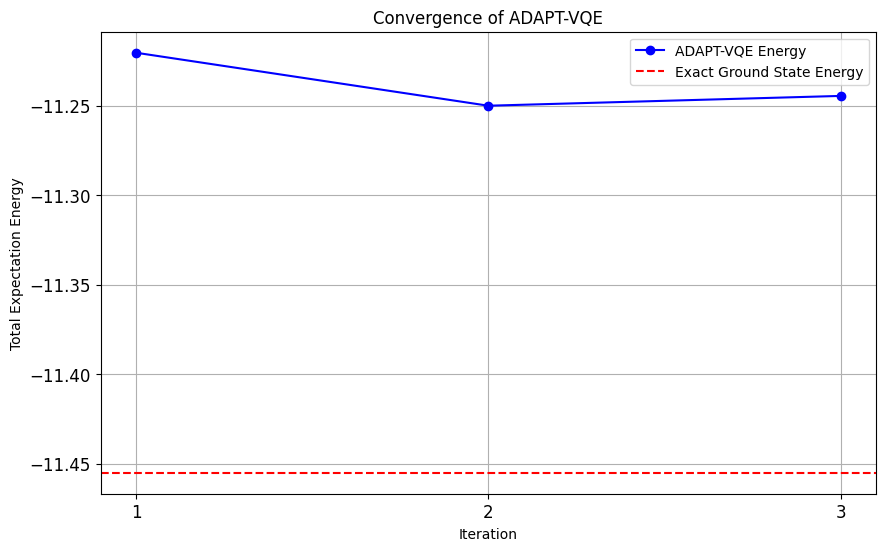

In [284]:
###### PERFORMING ADAPT-VQE #######

### Define constants
N = 5 # Number of spins
a = 1.0  # Lattice spacing

# coupling constants 
g = 2.0

# Calculate Hamiltonian parameters
J = -3 * g**2 / 16
hz = 3 * g**2 / 8
hx = -2 / (a * g)**2 

print("="*100)
print(f"Spins (N): {N}, Coupling (g) : {g}")
print("="*100)

# Calculate Hamiltonian
H_E = hamiltonian_elec(N, J, hz)
H_M = hamiltonian_mag(N, hx)
H_tot = H_E + H_M

# Exact Ground State Energy of H_tot
_, _, gs_exact, psi_realgs = exact_ground_state(H_tot)

# print(f"Commutators of the Observables: {commutator_hamiltonian(H_tot, observable_pool)}")

## ADAPT - VQE 
tolerance = 1e-3 # convergence threshold
n_iter = 3 # no of iterations

# Lattice Site (for Observable Pool & Unitary Application)
lattice_site = 0

# Step 1: Operator Pool
print(f"Selected Lattice Site: {lattice_site}")
operator_pool = define_operator_pool(lattice_site, N)

# Initialize lists to store iteration & expectation values
iterations = []
expectation_energies = []
# theta_vals = []  # Start with an empty list for theta values
selected_operators = []  # To keep track of already selected operators
last_applied_operator = None # Initialize a variable to store the last applied operator

# initialize the reference state
qc = initial_ref(N)
theta_vals = [J*hx/16, J*(-3*hx/16), J*(-3*hx/16), hz*(9*hx/16)] # np.random.randint(0, 10, 4)
qc = apply_unitary(qc, lattice_site, theta_vals, 1)

## MAIN LOOP for ADAPT-VQE
for iteration in range(n_iter):
           
    ### Step 2: Ansatz
    print("="*100)
    print(f">>> Iteration:{iteration}")
    print(f"Circuit Depth: {qc.depth()}")
    # print("Current Theta Values: ", theta_vals)
    
    ### Step 3: Measure the gradient (commutator expectation value) for each operator
    gradients = measure_gradient(H_tot, operator_pool, qc)
    print(f"Gradients: {gradients}")

    # Extract gradient values and corresponding keys (indices)
    gradient_values = np.array(list(gradients.values()))
    gradient_keys = list(gradients.keys())

    ### Step 4: Find the operator with the largest commutator / Gradient
    max_gradient_idx= np.argmax(gradient_values)
    max_gradient_op = gradient_keys[max_gradient_idx]  # This is a string like 'Y', 'YZ', etc.
    max_gradient = gradients[max_gradient_op]
    
    print(f"Operator with largest gradient: {max_gradient_op}, Gradient: {max_gradient}")

    # Compare with the last applied operator
    if last_applied_operator is not None:
        if max_gradient_op == last_applied_operator:
            print(f"Warning: The current operator ({max_gradient_op}) is the same as the last applied operator.")
            
            # Find the operator with the second largest gradient
            sorted_indices = np.argsort(gradient_values)[::-1]  # Sort gradients in descending order
            for idx in sorted_indices:
                if gradient_keys[idx] != last_applied_operator:
                    max_gradient_idx = idx
                    max_gradient_op = gradient_keys[max_gradient_idx]
                    max_gradient = gradient_values[max_gradient_idx]
                    print(f"Applying the second largest gradient operator instead: {max_gradient_op}, Gradient: {max_gradient}")
                    break
        else:
            print(f"The current operator ({max_gradient_op}) is different from the last applied operator ({last_applied_operator}).")
    else:
        print("This is the first iteration, so no previous operator to compare with.")


    # Update the last applied operator to the current one
    last_applied_operator = max_gradient_op

    # Store the chosen operators
    selected_operators.append(max_gradient_op)
    
    if np.linalg.norm(gradient_values) < tolerance:
        print(f"Terminating: Pool Gradient Norm: {np.linalg.norm(gradient_values)} is below the threshold: {tolerance}.")
        break            

    print("Current Theta Values: ", theta_vals)
    
    ### Step 5: Use VQE to optimize theta values
    def cost_function(theta_vals):
        temp_qc = qc.copy()
        print("--"*10)
        print(f"Initial Params: {theta_vals}")
        print("--"*10)
        apply_unitary(temp_qc, lattice_site, theta_vals, max_gradient_idx)
        return measure_exact_expectation_value(temp_qc, H_tot)

    initial_theta = np.zeros(len(theta_vals))
    initial_theta[max_gradient_idx] = theta_vals[max_gradient_idx]
    
    ## Optimize the new theta value for the selected operator
    # scipy.optimize.minimize(func, x0, ...)
    result = minimize(cost_function, initial_theta, method='COBYLA') #other options available: SLSQP, BFGS, etc
    print("Minimum Result:", result)
    optimized_theta = result.x
    # Update theta_vals with the optimized value
    #theta_vals.append(optimized_theta)
    # update the params with optimized_theta value
    theta_vals[max_gradient_idx] = optimized_theta[1]
    
    print(f"Optimized theta values: {theta_vals}")
    print(f"Cost function after optimization:  {result.fun}")
    # print(f"==> Applied Unitary: exp(-i ({theta_vals[max_gradient_idx]}) {max_gradient_op})")
    
    ### Step 6: Update the ansatz with the operator that has the largest gradient
    qc = apply_unitary(qc, lattice_site, theta_vals, max_gradient_idx)    
    qc.barrier()
    
    # get the statevector
    psi_adaptvqe = qi.Statevector.from_instruction(qc)
    
    # Calculate the overlap
    print(f"Overlap with Exact GS: {calc_overlap(psi_adaptvqe, psi_realgs)*100:.3f}%")

    # Store the iteration number and the expectation value
    iterations.append(iteration + 1)
    expectation_energies.append(result.fun)

    ### CHECK CONVERGENCE
    if np.abs(result.fun - gs_exact) < tolerance:
        print("="*25)
        print(f"SUCCESSFULLY CONVERGED!!!")
        print("="*100)
        break
    else:
        print(f">>> Did NOT converge in {iteration+1} iterations! <<<")
        print("="*100)
        
# Final results
final_cost = measure_exact_expectation_value(qc, H_tot)
print(f"\n Final Expectation Value of the Total Hamiltonian: {final_cost}")
print(f"\n Exact Energy of GS of H_tot: {gs_exact}")
print("="*35,">> DONE <<","="*35)
# Plotting the convergence of ADAPT-VQE
plt.figure(figsize=(10, 6))
plt.plot(iterations, expectation_energies, marker='o', linestyle='-', color='b', label='ADAPT-VQE Energy')
plt.axhline(y=gs_exact, color='r', linestyle='--', label='Exact Ground State Energy')
plt.xlabel('Iteration')
plt.xticks(iterations, fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Total Expectation Energy')
plt.title('Convergence of ADAPT-VQE')
plt.legend()
plt.grid(True)
plt.show()